# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Versuche im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des "überwachten Lernens" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die *Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen*, an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?
2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?
3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?
4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 



1. Ein Naiver Bayes Classifier wird trainiert, indem das Trainingsset durchlaufen wird und $fc(w, cat)$ und $cc(cat)$ für jedes Wort $w$ und jede Kategorie $cat$ gezählt werden. Diese Werte werden dann für die spätere Klassifikation gespeichert.
2. Es werden $P(G|D)$ und $P(B|D)$ berechnet und das Dokument wird der Kategorie zugeordnet, zu der die höhere Wahrscheinlichkeit gehört.
3. Die Annahme ist, dass die Wörter in einem Dokument voneinander unabhängig sind. Diese Annahme ist im Fall der Dokumentklassifikation nicht gegeben, da Wörter in einem Dokument häufig zusammen vorkommen.
4. In diesem Fall ist die Wahrscheinlichkeit gleich $0$. Das kann umgangen werden, indem statt $0$ eine kleine Zahl $>0$ verwendet wird.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion *getwords(doc)*, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen *split(), strip('sep')* und *lower()* der Klasse *String*.  


In [1]:
from typing import Dict


def getwords(doc: str, lower_bound=3, upper_bound=20) -> Dict[str, int]:
  """
  Takes a string of words and returns a dict of words that are between lower_bound (inclusive) and upper_bound (exclusive) characters long, with all values being set to 1.
  """
  split_list = doc.split()
  lowercased = set((word.lower() for word in split_list))
  in_range = [word for word in lowercased if len(word) >= lower_bound and len(word) < upper_bound]
  return dict.fromkeys(in_range, 1)

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion *getwords()* übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die *getwords()*-Funktion ausserhalb der Klasse definiert und beim Anlegen eines *Classifier*-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der *fc*-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der *cc*-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (*item*) und der entsprechenden Kategorisierung (*cat*) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert *getwords()*) in Worte zerlegt. Für jedes einzelne Wort wird dann *incf(self,f,cat)* aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt:
* Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
* und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [2]:
from functools import reduce


class Classifier:
  """
  A document classifier based on the Naive Bayes algorithm.

  Properties:
    fc: A dictionary of dictionaries. The first key are the seen words, the second key are the seen categories. The value is the number of times the word was seen in the category.
    cc: A dictionary of categories. The key is the category, the value is the number of times the category was seen.
  """

  def __init__(self, getfeatures = getwords) -> None:
    """
    Initializes the classifier with a function that extracts features from a document.
    """
    self.fc = {}
    self.cc = {}
    self.getfeatures = getfeatures

  def incf(self, f: str, cat: str) -> None:
    """
    Increments the count of an item in a category.
    """
    self.fc.setdefault(f, {})
    self.fc[f].setdefault(cat, 0)
    self.fc[f][cat] += 1

  def incc(self, cat: str) -> None:
    """
    Increments the count of a category.
    """
    self.cc.setdefault(cat, 0)
    self.cc[cat] += 1

  def fcount(self, f: str, cat: str) -> int:
    """
    Returns the number of times an item was seen in a category.
    """
    return self.fc.get(f, {}).get(cat, 0)

  def catcount(self, cat: str) -> int:
    """
    Returns the number of items in a category.
    """
    return self.cc.get(cat, 0)

  def totalcount(self) -> int:
    """
    Returns the total number of items.
    """
    return sum(self.cc.values())

  def train(self, item: str, cat: str) -> None:
    """
    Trains the classifier with an item and its category.
    item: The item to train with.
    cat: The category of the item.
    """
    features = self.getfeatures(item)
    for f in features:
      self.incf(f, cat)
    self.incc(cat)

  def fprob(self, f: str, cat: str) -> float:
    """
    Returns the probability of an item in a category.
    """
    if self.catcount(cat) == 0:
      return 0.0
    return self.fcount(f, cat) / self.catcount(cat)

  def weightedprob(self, f: str, cat: str, initprob = 0.5) -> float:
    """
    Returns the weighted probability of an item in a category.

    initprob: The initial probability of an item in a category.
    """
    count = sum((self.fcount(f, cat)) for cat in self.cc.keys())
    return (initprob + count * self.fprob(f, cat)) / (1 + count)

  def prob(self, item: str, cat: str) -> float:
    """
    Returns the probability of a category for an item.

    item: The item to classify. This is an entire document.
    cat: The category to classify the item in.
    """
    features = self.getfeatures(item)
    weighted_probs = (self.weightedprob(f, cat) for f in features)
    weighted_probs_product = reduce(lambda x, y: x * y, weighted_probs, 1)
    return weighted_probs_product * self.catcount(cat) / self.totalcount()

  def classify(self, item: str) -> str:
    """
    Returns the category with the highest probability for an item.

    item: The item to classify. This is an entire document.
    """
    return max(self.cc.keys(), key=lambda cat: self.prob(item, cat))

## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in der
[NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [3]:
classifier = Classifier()

classifier.train("Nobody owns the water.", "good")
classifier.train("the quick rabbit jumps fences", "good")
classifier.train("buy pharmaceuticals now", "bad")
classifier.train("make quick money at the online casino", "bad")
classifier.train("the quick brown fox jumps", "good")
classifier.train("next meeting is at night", "good")
classifier.train("meeting with your superstar", "bad")
classifier.train("money like water", "bad")

In [4]:
good = classifier.prob("the money jumps", "good")
bad = classifier.prob("the money jumps", "bad")

print("Probability of 'the money jumps' being good: " + str(good))
print("Probability of 'the money jumps' being bad: " + str(bad))

result = classifier.classify("the money jumps")
print(result)

Probability of 'the money jumps' being good: 0.029166666666666664
Probability of 'the money jumps' being bad: 0.012499999999999999
good


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.
2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf) definiert.
3. Diskutieren Sie das Ergebnis
4. Wie könnte die Klassifikationsgüte durch Modifikation der *getwords()*-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

In [5]:
import feedparser

def countFeed(feedList, title, should_print=False):
    if should_print:
        print(f"--------------------News from {title}------------------------")
    count = 0
    for feed in feedList:
        if should_print:
            print()
            print("*"*30)
            print(feed)
        f=feedparser.parse(feed)
        for e in f.entries:
            if hasattr(e, 'title') and hasattr(e, 'description'):
                if should_print:
                    print('\n---------------------------')
                fulltext=stripHTML(e.title+' '+e.description)
                if should_print:
                    print(fulltext)
                count += 1
    if should_print:
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
    return count

def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': 
            s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p


trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/']

test=['http://rss.golem.de/rss.php?r=sw&feed=RSS0.91',
      'http://newsfeed.zeit.de/politik/index',  
      'http://www.welt.de/?service=Rss']

countnews={}
countnews['tech']=countFeed(trainTech, 'trainTech', should_print=True)
countnews['nontech']=countFeed(trainNonTech, 'trainNonTech')
countnews['test']=countFeed(test, 'test')

print('Number of used trainings samples in categorie tech',countnews['tech'])
print('Number of used trainings samples in categorie notech',countnews['nontech'])
print('Number of used test samples',countnews['test'])
print('--'*30)

--------------------News from trainTech------------------------

******************************
http://rss.chip.de/c/573/f/7439/index.rss

******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml

---------------------------
Telekom schaltet Zahlung an Münzfernsprechern ab Die Telekom will die Münzzahlung an den letzten Fernsprechern einstellen. Damit ist der öffentliche Münzfernsprecher endgültig Geschichte. Ein Rückblick.
Am kommenden Montag wird an den bundesweit noch rund 12.000 verbliebenen Fernsprechern die Münzzahlung "deaktiviert", wie die Telekom mitteilt. "Ab Ende Januar wird dann auch die Zahlungsfunktion mittels Telefonkarten und somit der gesamte Tel...

---------------------------
Enkel findet Uralt-Computer in Großvaters Keller In einem Internetforum hat ein Nutzer seinen Kellerfund veröffentlicht – einen Computer von 1956. Von dem legendären Rechner wurden nur 45 Stück hergestellt.
Im Internetforum "Reddit" hat ein Nutzer die Bilder eines Comput

In [6]:
from typing import List


def get_feed_items(feed: str) -> List[str]:
    """
    Returns the texts of a feed.
    """
    texts = []
    f = feedparser.parse(feed)
    for e in f.entries:
        if hasattr(e, 'title') and hasattr(e, 'description'):
            texts.append(stripHTML(e.title + ' ' + e.description))
    return texts

### Training

In [7]:
rssClassifier = Classifier()

for feed in trainTech:
    for text in get_feed_items(feed):
        rssClassifier.train(text, 'Tech')

for feed in trainNonTech:
    for text in get_feed_items(feed):
        rssClassifier.train(text, 'NonTech')

### Classification

In [8]:
def classify_feed_texts(feed: str) -> List[str]:
  results = []
  for text in get_feed_items(feed):
    result = rssClassifier.classify(text)
    results.append(result)
  return results

In [9]:
from typing import Tuple


def construct_matrix(feed: str, label: str) -> Tuple[List[str], List[str]]:
  """
  Returns a tuple, where
  - the first element is the list of results
  - the second element is the list of labels, which is always the same label repeated
  """
  results = classify_feed_texts(feed)
  return (results, [label] * len(results))

In [10]:
testTech = test[0]
testNonTech = test[1:]

results = construct_matrix(testTech, 'Tech')
for feed in testNonTech:
  predictions, labels = construct_matrix(feed, 'NonTech')
  results[0].extend(predictions)
  results[1].extend(labels)

### Evaluation

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
  fig, ax = plt.subplots(figsize=(5,5))
  ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, ax=ax, normalize='true')
  plt.show()

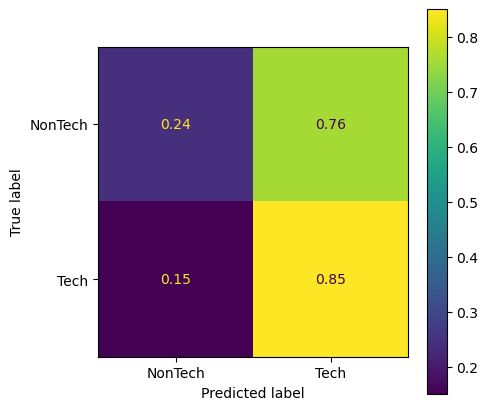

In [30]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array(results).T, columns=['prediction', 'label'])

plot_confusion_matrix(df['label'], df['prediction'])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(df['label'], df['prediction']))

              precision    recall  f1-score   support

     NonTech       0.65      0.24      0.35        45
        Tech       0.50      0.85      0.63        40

    accuracy                           0.53        85
   macro avg       0.57      0.55      0.49        85
weighted avg       0.58      0.53      0.48        85

